# Section 1 - Observed Flux Values From NOAA 3 Day Forecast

## Yearly Average b/w 1996 - 2023

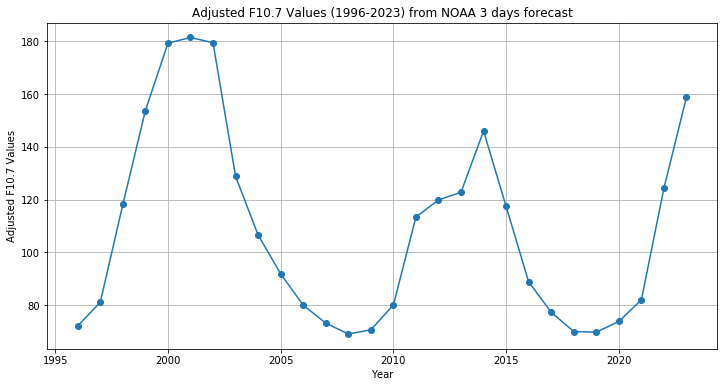

In [22]:
## OBSERVED FLUX VALUES FROM 3 DAY FORECAST

import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = '/media/faraday/DATA/solar/F10.7/forecasts/NOAA/3DF/3DayForecast_1996to2023.csv'
df = pd.read_csv(file_path)

# Convert the 'Date' column to datetime format, handling various date formats
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d', errors='coerce')

# Filter out rows where the date could not be parsed
df = df.dropna(subset=['Date'])

# Extract the year from the Date column
df['Year'] = df['Date'].dt.year

# Group by year and calculate the mean observed value for each year
#annual_observed = df['Date'], df['Observed']
annual_observed = df.groupby('Year')['Observed'].mean().reset_index()

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(annual_observed['Year'], annual_observed['Observed'], marker='o')
plt.xlabel('Year')
plt.ylabel('Adjusted F10.7 Values')
plt.title('Adjusted F10.7 Values (1996-2023) from NOAA 3 days forecast')
plt.grid(True)
plt.show()


This is the YEARLY average from 1996 to 2003. Flux values are adjusted. 

## Monthly Average b/w 1996 - 2023

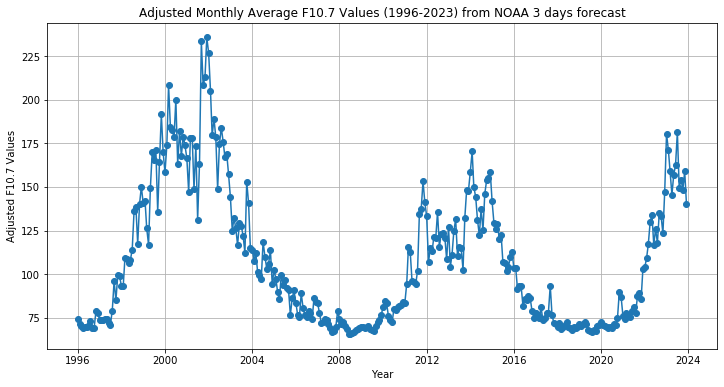

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = '/media/faraday/DATA/solar/F10.7/forecasts/NOAA/3DF/3DayForecast_1996to2023.csv'
df = pd.read_csv(file_path)

# Convert the 'Date' column to datetime format, handling various date formats
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d', errors='coerce')

# Filter out rows where the date could not be parsed
df = df.dropna(subset=['Date'])

# Extract the year and month from the Date column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Group by year and month and calculate the mean observed value for each month
monthly_observed = df.groupby(['Year', 'Month'])['Observed'].mean().reset_index()

# Create a datetime column for plotting purposes
monthly_observed['YearMonth'] = pd.to_datetime(monthly_observed[['Year', 'Month']].assign(DAY=1))

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(monthly_observed['YearMonth'], monthly_observed['Observed'], marker='o')
plt.xlabel('Year')
plt.ylabel('Adjusted F10.7 Values')
plt.title('Adjusted Monthly Average F10.7 Values (1996-2023) from NOAA 3 days forecast')
plt.grid(True)
plt.show()


This is the MONTHLY average from 1996 to 2003. Flux values are adjusted.

## Daily Observations from 1996 - 2023

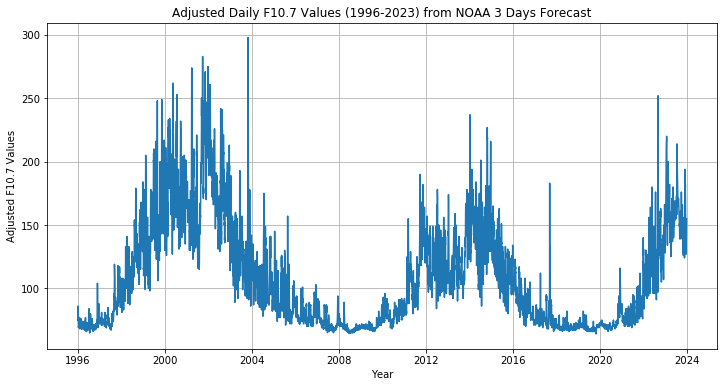

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = '/media/faraday/DATA/solar/F10.7/forecasts/NOAA/3DF/3DayForecast_1996to2023.csv'
df = pd.read_csv(file_path)

# Convert the 'Date' column to datetime format, handling various date formats
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d', errors='coerce')

# Filter out rows where the date could not be parsed
df = df.dropna(subset=['Date'])

# Plot the daily observed values
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Observed'])
plt.xlabel('Year')
plt.ylabel('Adjusted F10.7 Values')
plt.title('Adjusted Daily F10.7 Values (1996-2023) from NOAA 3 Days Forecast')
plt.grid(True)
plt.show()


This is the DAILY adjusted flux values from 1996 to 2003. Flux values are adjusted.

### The following section was to turn the plots into an interactive mode, such that when cursor is moved over a plot, it can tell the flux value at that point. Will try again later. 

### For now skip to section 2

In [26]:
!pip install mplcursors

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import mplcursors

# Load the CSV file
file_path = '/media/faraday/DATA/solar/F10.7/forecasts/NOAA/3DF/3DayForecast_1996to2023.csv'
df = pd.read_csv(file_path)

# Convert the 'Date' column to datetime format, handling various date formats
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d', errors='coerce')

# Filter out rows where the date could not be parsed
df = df.dropna(subset=['Date'])

# Plot the daily observed values
plt.figure(figsize=(12, 6))
line, = plt.plot(df['Date'], df['Observed'])
plt.xlabel('Year')
plt.ylabel('Adjusted F10.7 Values')
plt.title('Adjusted F10.7 Values (1996-2023) from NOAA 3 Days Forecast')
plt.grid(True)

# Add interactive cursor
cursor = mplcursors.cursor(line, hover=True)
cursor.connect("add", lambda sel: sel.annotation.set_text(f"Date: {df['Date'][sel.target.index].strftime('%Y-%m-%d')}\nF10.7 Value: {df['Observed'][sel.target.index]:.2f}"))

plt.show()


ModuleNotFoundError: No module named 'mplcursors'

In [31]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [32]:
import pandas as pd
import plotly.graph_objects as go

# Load the CSV file
file_path = '/media/faraday/DATA/solar/F10.7/forecasts/NOAA/3DF/3DayForecast_1996to2023.csv'
df = pd.read_csv(file_path)

# Convert the 'Date' column to datetime format, handling various date formats
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d', errors='coerce')

# Filter out rows where the date could not be parsed
df = df.dropna(subset=['Date'])

# Create the interactive plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df['Date'],
    y=df['Observed'],
    mode='lines',
    name='Observed F10.7 Values'
))

# Update layout
fig.update_layout(
    title='Adjusted F10.7 Values (1996-2023) from NOAA 3 Days Forecast',
    xaxis_title='Year',
    yaxis_title='Adjusted F10.7 Values',
    hovermode='x unified'
)

# Show the plot
fig.show()


ModuleNotFoundError: No module named 'plotly'

# Section 2 - Statistical Trends

### 12 month rolling mean 

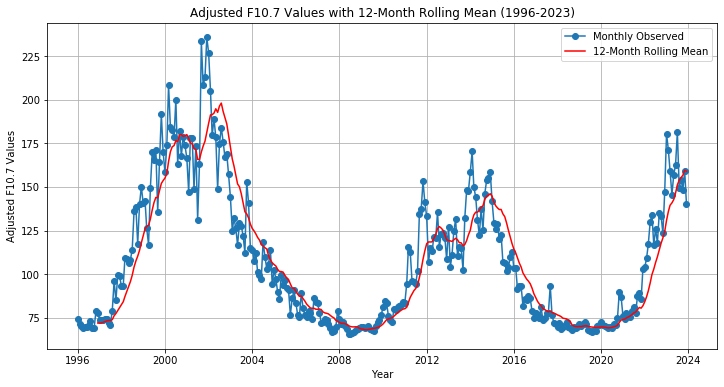

In [4]:
### TREND ANALYSIS 

# Calculate rolling average (e.g., 12-month rolling average)
monthly_observed['RollingMean'] = monthly_observed['Observed'].rolling(window=12).mean()

# Plot the rolling average along with the original data
plt.figure(figsize=(12, 6))
plt.plot(monthly_observed['YearMonth'], monthly_observed['Observed'], marker='o', label='Monthly Observed')
plt.plot(monthly_observed['YearMonth'], monthly_observed['RollingMean'], color='red', label='12-Month Rolling Mean')
plt.xlabel('Year')
plt.ylabel('Adjusted F10.7 Values')
plt.title('Adjusted F10.7 Values with 12-Month Rolling Mean (1996-2023)')
plt.grid(True)
plt.legend()
plt.show()


Seasonal Patterns:

- The plot shows clear cyclic or seasonal patterns in the observed F10.7 values. These patterns likely correspond to the solar cycle, which is approximately 11 years. The peaks and troughs in the data represent periods of high and low solar activity, respectively.

12-Month Rolling Mean:

- The red line represents the 12-month rolling mean, which smooths out short-term fluctuations and highlights longer-term trends.
- The rolling mean provides a clearer view of the overall trend and helps in identifying the cyclical nature of solar activity.

Long-Term Trends:

- The rolling mean shows that there are distinct periods of increased solar activity, followed by periods of decreased activity.
- Can observe peaks around 2000, 2012, and a rise starting around 2020, corresponding to solar maxima. The troughs represent solar minima, occurring around 2008 and possibly around 2019.

### Stat Summary

In [6]:
### STATISTICAL SUMMARY 
    # Provide a statistical summary of the observed values.

# Print statistical summary
print(monthly_observed['Observed'].describe())


count    336.000000
mean     108.197355
std       38.546783
min       65.806452
25%       74.403802
50%       96.933180
75%      133.677419
max      235.580645
Name: Observed, dtype: float64


### Statistical Summary Breakdown

#### Count:
Value: 336.000000
Interpretation: There are 336 monthly observations in the dataset. This means we have data for 336 months, which roughly corresponds to 28 years of monthly data (since 336 / 12 = 28).

#### Mean (Average):
Value: 108.197355
Interpretation: The average F10.7 value observed over the period is approximately 108.20 solar flux units (SFU). This represents the central tendency of the solar flux values in our dataset.

#### Standard Deviation (Std):
Value: 38.546783
Interpretation: The standard deviation is about 38.55 SFU. This indicates the amount of variation or dispersion in the F10.7 values. A higher standard deviation means the values are more spread out from the mean.

#### Minimum (Min):
Value: 65.806452
Interpretation: The lowest observed F10.7 value in the dataset is approximately 65.81 SFU. This represents the minimum solar activity recorded.

#### 25th Percentile (25%):
The 25th percentile is approximately 74.40 SFU.

Interpretation: This means that 25% of the observed F10.7 values are below 74.40 SFU. It gives an idea of the lower quartile of the dataset, indicating the value below which a quarter of the data falls.

#### Median (50%):
Value: 96.933180
Interpretation: The median is approximately 96.93 SFU. This is the middle value of the dataset, meaning half of the observations are below this value and half are above it. The median is a robust measure of central tendency, especially useful when the data contains outliers.
75th Percentile (75%):

#### Value: 133.677419
Interpretation: The 75th percentile is approximately 133.68 SFU. This means that 75% of the observed F10.7 values are below 133.68 SFU. It represents the upper quartile of the dataset, indicating the value below which three-quarters of the data falls.
Maximum (Max):

#### Value: 235.580645
Interpretation: The highest observed F10.7 value in the dataset is approximately 235.58 SFU. This represents the maximum solar activity recorded.
Significance of the Summary
Central Tendency: The mean and median provide insights into the central tendency of the data. In this case, the mean (108.20) is higher than the median (96.93), which suggests a right-skewed distribution (a few high values pull the mean upwards).

#### Dispersion: 
The standard deviation (38.55) and the interquartile range (IQR, calculated as 75th percentile - 25th percentile = 133.68 - 74.40 = 59.28) provide information about the spread of the data. A larger standard deviation or IQR indicates more variability in the solar flux values.

#### Range: 
The difference between the maximum (235.58) and minimum (65.81) values shows the range of observed solar flux values, indicating periods of both very high and very low solar activity.

#### Outliers: 
By comparing the 25th and 75th percentiles with the minimum and maximum values, we can infer the presence of outliers. In this dataset, the maximum value (235.58) is quite far from the 75th percentile (133.68), suggesting potential outliers on the higher end of the distribution.

### Histogram 

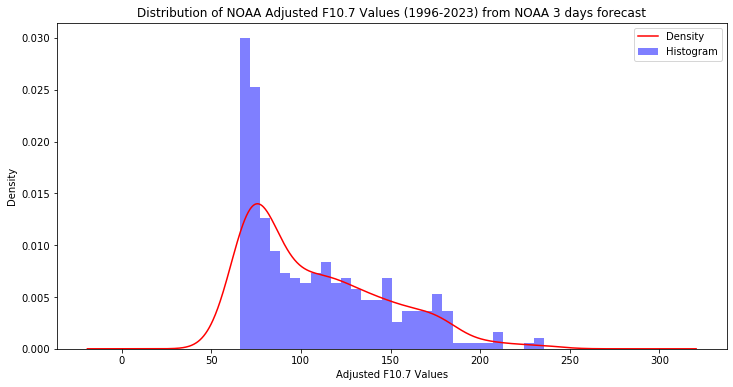

In [38]:
### HISTOGRAM & DENSITY PLOT 
    # Visualize the distribution of observed values.

# Plot histogram and density plot
plt.figure(figsize=(12, 6))
monthly_observed['Observed'].plot(kind='hist', bins=30, alpha=0.5, color='blue', density=True, label='Histogram')
monthly_observed['Observed'].plot(kind='kde', color='red', label='Density')
plt.xlabel('Adjusted F10.7 Values')
plt.ylabel('Density')
plt.title('Distribution of NOAA Adjusted F10.7 Values (1996-2023) from NOAA 3 days forecast')
plt.legend()
plt.show()


# Section 3 - Measured F10.7 Penticton - Adjusted Flux Values - 1947 - 2024

So far we looked at the NOAA adjusted measured flux values from 1996 - 2023. These values were measured along with the corresponding 3 day predictions datatset from NOAA. 

But now in section 3 we will look at Penticton's Adjusted Flux Values, which are from 1947 to present.

So, there is an overlap of data between the two sources from 1996 to present, which we want to verify if the data from the two sources match or are there any discrepancies. 

### Monthly Averages with Measured Adjusted Penticton values from 1947 - 2024

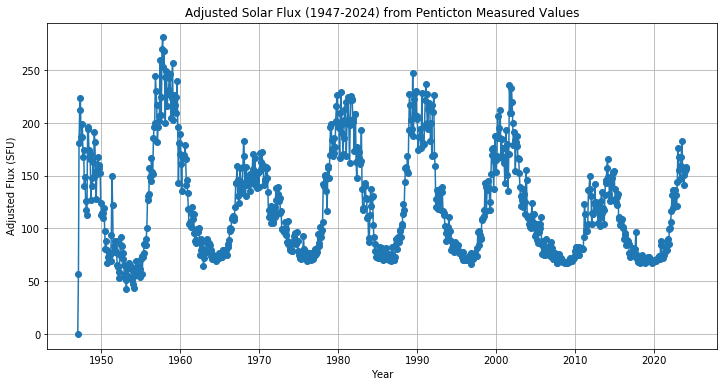

In [9]:
####### MONTHLY AVERGAGES WITH MEASURED PENTICTON VALUES FROM 1947 TO 2024

import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = '/media/faraday/DATA/solar/F10.7/measured/Penticton_Obs_Adj.csv'
df = pd.read_csv(file_path)

# Convert the 'time' column to datetime format
df['time'] = pd.to_datetime(df['time (yyyy-MM-dd\'T\'HH:mm:ss)'])

# Extract the year and month from the time column
df['Year'] = df['time'].dt.year
df['Month'] = df['time'].dt.month

# Group by year and month and calculate the mean adjusted flux value for each month
monthly_adjusted_flux = df.groupby(['Year', 'Month'])['adjusted_flux (solar flux unit (SFU))'].mean().reset_index()

# Create a datetime column for plotting purposes
monthly_adjusted_flux['YearMonth'] = pd.to_datetime(monthly_adjusted_flux[['Year', 'Month']].assign(DAY=1))

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(monthly_adjusted_flux['YearMonth'], monthly_adjusted_flux['adjusted_flux (solar flux unit (SFU))'], marker='o')
plt.xlabel('Year')
plt.ylabel('Adjusted Flux (SFU)')
plt.title('Adjusted Solar Flux (1947-2024) from Penticton Measured Values')
plt.grid(True)
plt.show()


### OVERLAY of NOAA Adjusted measured flux value from 3DF with Penticton adjusted measured flux value 

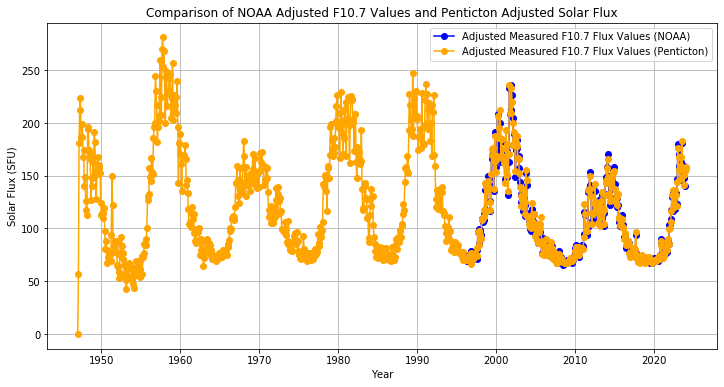

In [11]:

# Verifies that observed values from Penticton 3 day forecast dataset matches with NOAA-Penticton actual measured adjusted values

import pandas as pd
import matplotlib.pyplot as plt

# Load the first CSV file
file_path1 = '/media/faraday/DATA/solar/F10.7/forecasts/NOAA/3DF/3DayForecast_1996to2023.csv'
df1 = pd.read_csv(file_path1)

# Convert the 'Date' column to datetime format for the first dataset
df1['Date'] = pd.to_datetime(df1['Date'], format='%Y%m%d', errors='coerce')

# Filter out rows where the date could not be parsed for the first dataset
df1 = df1.dropna(subset=['Date'])

# Extract the year and month from the Date column for the first dataset
df1['Year'] = df1['Date'].dt.year
df1['Month'] = df1['Date'].dt.month

# Group by year and month and calculate the mean observed value for each month for the first dataset
monthly_observed1 = df1.groupby(['Year', 'Month'])['Observed'].mean().reset_index()

# Create a datetime column for plotting purposes for the first dataset
monthly_observed1['YearMonth'] = pd.to_datetime(monthly_observed1[['Year', 'Month']].assign(DAY=1))

# Load the second CSV file
file_path2 = '/media/faraday/DATA/solar/F10.7/measured/Penticton_Obs_Adj.csv'
df2 = pd.read_csv(file_path2)

# Convert the 'time' column to datetime format for the second dataset
df2['time'] = pd.to_datetime(df2['time (yyyy-MM-dd\'T\'HH:mm:ss)'])

# Extract the year and month from the time column for the second dataset
df2['Year'] = df2['time'].dt.year
df2['Month'] = df2['time'].dt.month

# Group by year and month and calculate the mean adjusted flux value for each month for the second dataset
monthly_adjusted_flux = df2.groupby(['Year', 'Month'])['adjusted_flux (solar flux unit (SFU))'].mean().reset_index()

# Create a datetime column for plotting purposes for the second dataset
monthly_adjusted_flux['YearMonth'] = pd.to_datetime(monthly_adjusted_flux[['Year', 'Month']].assign(DAY=1))

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(monthly_observed1['YearMonth'], monthly_observed1['Observed'], marker='o', color='blue', label='Adjusted Measured F10.7 Flux Values (NOAA)')
plt.plot(monthly_adjusted_flux['YearMonth'], monthly_adjusted_flux['adjusted_flux (solar flux unit (SFU))'], marker='o', color='orange', label='Adjusted Measured F10.7 Flux Values (Penticton)')
plt.xlabel('Year')
plt.ylabel('Solar Flux (SFU)')
plt.title('Comparison of NOAA Adjusted F10.7 Values and Penticton Adjusted Solar Flux')
plt.grid(True)
plt.legend()
plt.show()


# Next Plan

- To change Penticton adjusted flux values (1947 - 2023) plots as a daily measurement plot to observe much more dynamic solar events on a daily basis 
- To plot the predicted day 1, day 2, day 3 values alongside the daily observations, so as to draw a comparison of variation across day 1 with observed, day 2 with observed, day 3 with observed
    --- Hypothesis is that the variation of day 3 prediction is going to be the largesrt across the trend compared to day 1 with observed. This will show that accuracy of 3rd day prediction is lower than 1st day.
- Increase the scope of this plot on a 27.5 days - solar cycle domain to see a more detailed trend
  